# Exploratory Data Analysis- Telco Customer Churn

### Goal: To perform an exploratory data analysis on the telecom customer dataset to gain insights into customer behavior, identify patterns associated with churn, and evaluate the factors influencing customer retention and service usage.

Link to the dataset: https://www.kaggle.com/datasets/mustafakeser4/bigquery-churn-dataset/data

### Metadata:
1. customer_id: Unique identifier for each customer.
2. state: The U.S. state in which the customer resides.
3. account_length: Duration in days that the customer has been with the company.
4. area_code: The area code of the customer's phone number.
5. international_plan: Whether the customer has an international calling plan (True/False).
6. voice_mail_plan: Whether the customer has a voice mail service (True/False).
7. number_vmail_messages: Number of voice mail messages the customer has.
8. total_day_minutes: Total number of minutes the customer has used during the day.
9. total_day_calls: Total number of calls made by the customer during the day.
10. total_day_charge: Total charges incurred by the customer for day-time calls.
11. total_eve_minutes: Total number of minutes the customer has used during the evening.
12. total_eve_calls: Total number of calls made by the customer during the evening.
13. total_eve_charge: Total charges incurred by the customer for evening calls.
14. total_night_minutes: Total number of minutes the customer has used during the night.
15. total_night_calls: Total number of calls made by the customer during the night.
16. total_night_charge: Total charges incurred by the customer for night-time calls.
17. total_intl_minutes: Total number of minutes the customer has used for international calls.
18. total_intl_calls: Total number of international calls made by the customer.
19. total_intl_charge: Total charges incurred by the customer for international calls.
20. number_customer_service_calls: Number of calls made by the customer to customer service.
21. churn: Indicates whether the customer has churned (True/False).

###Importing Libraries and Loading the Dataset

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/CABA DATA/churn.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,customer_id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,932aff1e-186f-418c-8716-28bba167c384,NY,86,area_code_510,False,False,0,70.7,125,12.02,...,113,17.94,174.6,107,7.86,0.0,0,0.0,2,False
1,143a0b05-b95a-4d00-ad2a-9c1b18234c29,VT,165,area_code_510,False,False,0,242.9,126,41.29,...,65,17.83,228.4,126,10.28,0.0,0,0.0,1,False
2,45debf35-7e4d-42da-ba4e-d737a8997e16,KS,70,area_code_415,False,False,0,222.8,114,37.88,...,113,18.35,223.5,122,10.06,0.0,0,0.0,1,False
3,76b4b68f-1113-4411-88ad-de38b482e9fb,NM,158,area_code_408,False,False,0,172.4,114,29.31,...,69,21.81,235.3,104,10.59,0.0,0,0.0,2,False
4,6ee9cecd-1a09-4f4a-937e-aa848c392bed,ND,101,area_code_415,False,False,0,217.7,118,37.01,...,128,19.69,185.3,128,8.34,0.0,0,0.0,3,False


### Understanding the Data Structure

In [2]:
df.columns

Index(['customer_id', 'state', 'account_length', 'area_code',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [3]:
# Check the data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    4250 non-null   object 
 1   state                          4250 non-null   object 
 2   account_length                 4250 non-null   int64  
 3   area_code                      4250 non-null   object 
 4   international_plan             4250 non-null   bool   
 5   voice_mail_plan                4250 non-null   bool   
 6   number_vmail_messages          4250 non-null   int64  
 7   total_day_minutes              4250 non-null   float64
 8   total_day_calls                4250 non-null   int64  
 9   total_day_charge               4250 non-null   float64
 10  total_eve_minutes              4250 non-null   float64
 11  total_eve_calls                4250 non-null   int64  
 12  total_eve_charge               4250 non-null   f

In [4]:
df.describe(include="all")

,customer_id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250,4250,4250.000000,4250,4250,4250,4250.000000,4250.000000,4250.000000,4250.000000,...,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250
unique,4250,51,NaN,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,932aff1e-186f-418c-8716-28bba167c384,WV,NaN,area_code_415,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,1,139,NaN,2108,3854,3138,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3652
mean,NaN,NaN,100.236235,NaN,NaN,NaN,7.631765,180.259600,99.907294,30.644682,...,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,NaN
std,NaN,NaN,39.698401,NaN,NaN,NaN,13.439882,54.012373,19.850817,9.182096,...,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,73.000000,NaN,NaN,NaN,0.000000,143.325000,87.000000,24.365000,...,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,NaN,100.000000,NaN,NaN,NaN,0.000000,180.450000,100.000000,30.680000,...,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,NaN,127.000000,NaN,NaN,NaN,16.000000,216.200000,113.000000,36.750000,...,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,NaN


In [5]:
df.isnull().sum()

,0
customer_id,0
state,0
account_length,0
area_code,0
international_plan,0
voice_mail_plan,0
number_vmail_messages,0
total_day_minutes,0
total_day_calls,0
total_day_charge,0


In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

,0
customer_id,4250
state,51
account_length,215
area_code,3
international_plan,2
voice_mail_plan,2
number_vmail_messages,46
total_day_minutes,1843
total_day_calls,120
total_day_charge,1843


In [15]:
df.drop('customer_id', axis=1, inplace=True)

### Understanding customer usage by subscription of international call and voice mail plan

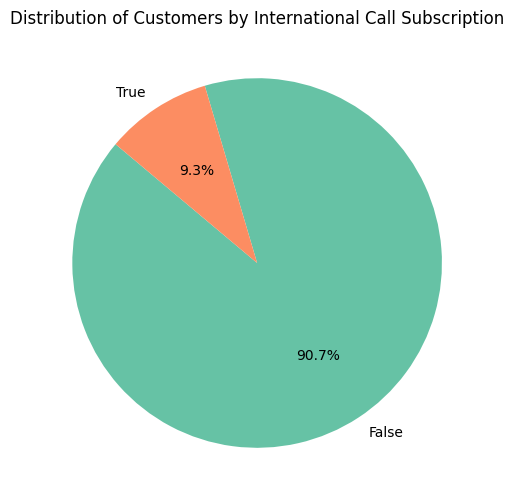

In [37]:
# Count the number of customers with and without international plans
international_plan_counts = df['international_plan'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(international_plan_counts, labels=international_plan_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=140)
plt.title('Distribution of Customers by International Call Subscription')
plt.show()

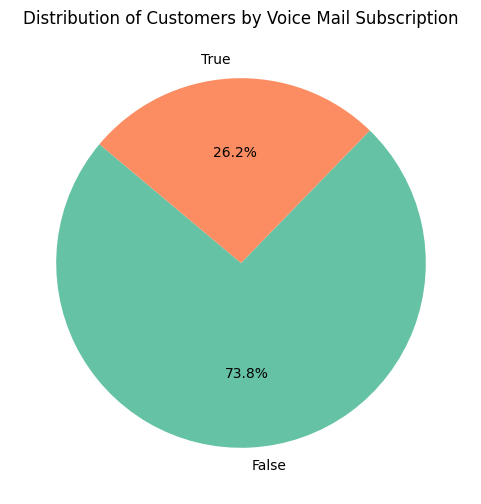

In [38]:
# Count the number of customers with and without voice mail plans
voice_mail_plan_counts = df['voice_mail_plan'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(voice_mail_plan_counts, labels=voice_mail_plan_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=140)
plt.title('Distribution of Customers by Voice Mail Subscription')
plt.show()


### Understanding the distribution of account length, how long does the customer use the telco service

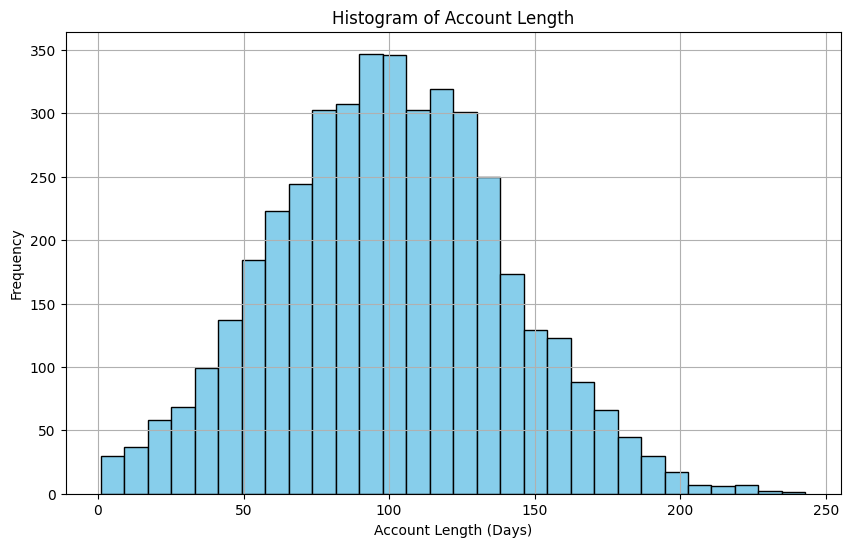

In [43]:
# Plot histogram of account length
plt.figure(figsize=(10, 6))
plt.hist(df['account_length'], bins=30, edgecolor='black', color='skyblue')
plt.title('Histogram of Account Length')
plt.xlabel('Account Length (Days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Comparing the average total minutes of call during day, evening and night

<ipython-input-59-0cdf111f4a83>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Time of Day', y='Average Minutes', data=average_minutes, palette='Set2')


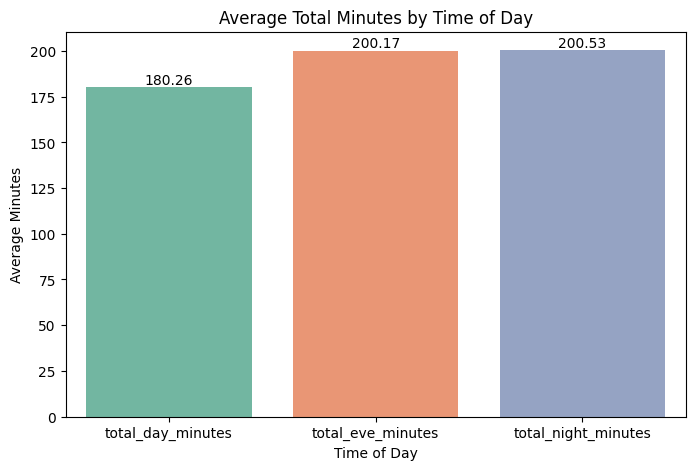

In [59]:
# Calculate average total minutes for day, evening, and night
average_minutes = df[['total_day_minutes', 'total_eve_minutes', 'total_night_minutes']].mean().reset_index()
average_minutes.columns = ['Time of Day', 'Average Minutes']

# Plot average total minutes
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Time of Day', y='Average Minutes', data=average_minutes, palette='Set2')

# Add value annotations on the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Average Total Minutes by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Minutes')
plt.show()

### Comparing the average total call during day, evening and night

<ipython-input-58-9dc71785793a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Time of Day', y='Average Calls', data=average_calls, palette='Set2')


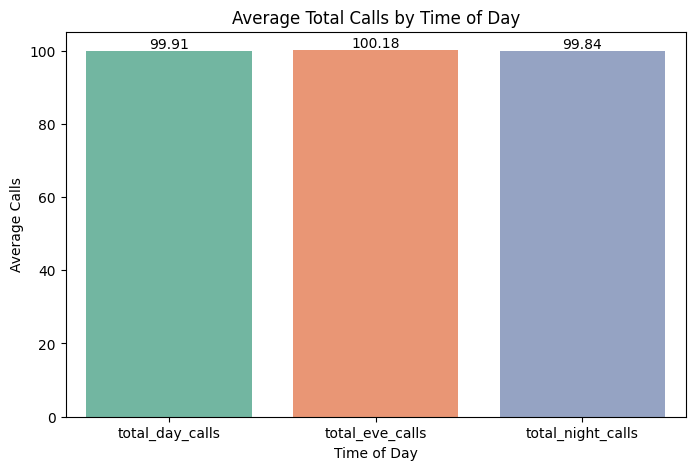

In [58]:
# Calculate average total calls for day, evening, and night
average_calls = df[['total_day_calls', 'total_eve_calls', 'total_night_calls']].mean().reset_index()
average_calls.columns = ['Time of Day', 'Average Calls']

# Plot average total calls
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Time of Day', y='Average Calls', data=average_calls, palette='Set2')

# Add value annotations on the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Average Total Calls by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Calls')
plt.show()


### Comparing the average total call charges during day, evening and night

<ipython-input-60-ff5f9f5a5536>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Time of Day', y='Average Charge', data=average_charges, palette='Set2')


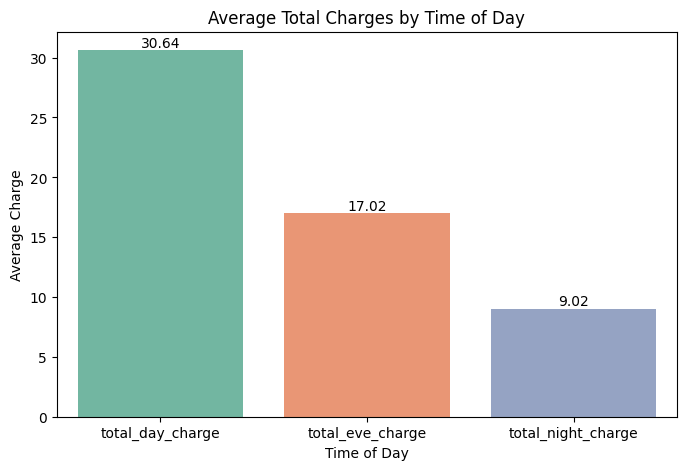

In [60]:
# Calculate average total charges for day, evening, and night
average_charges = df[['total_day_charge', 'total_eve_charge', 'total_night_charge']].mean().reset_index()
average_charges.columns = ['Time of Day', 'Average Charge']

# Plot average total charges
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Time of Day', y='Average Charge', data=average_charges, palette='Set2')

# Add value annotations on the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Average Total Charges by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Charge')
plt.show()


### Question: What is the distribution of customer churn?

<ipython-input-42-3cf9f7882805>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='churn', data=df, palette='Set2')


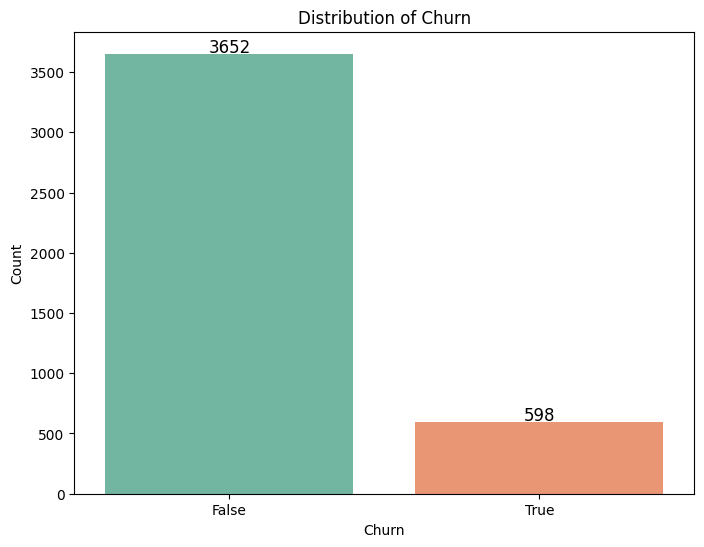

In [42]:
# Plot distribution of churn
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='churn', data=df, palette='Set2')

# Add value annotations on the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(
        p.get_x() + width / 2,
        p.get_height() + 50,  # Adjust the vertical position as needed
        f'{int(p.get_height())}',
        ha='center',
        va='center',
        color='black',
        fontsize=12
    )

plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

### Question: What is average charges by churn status?

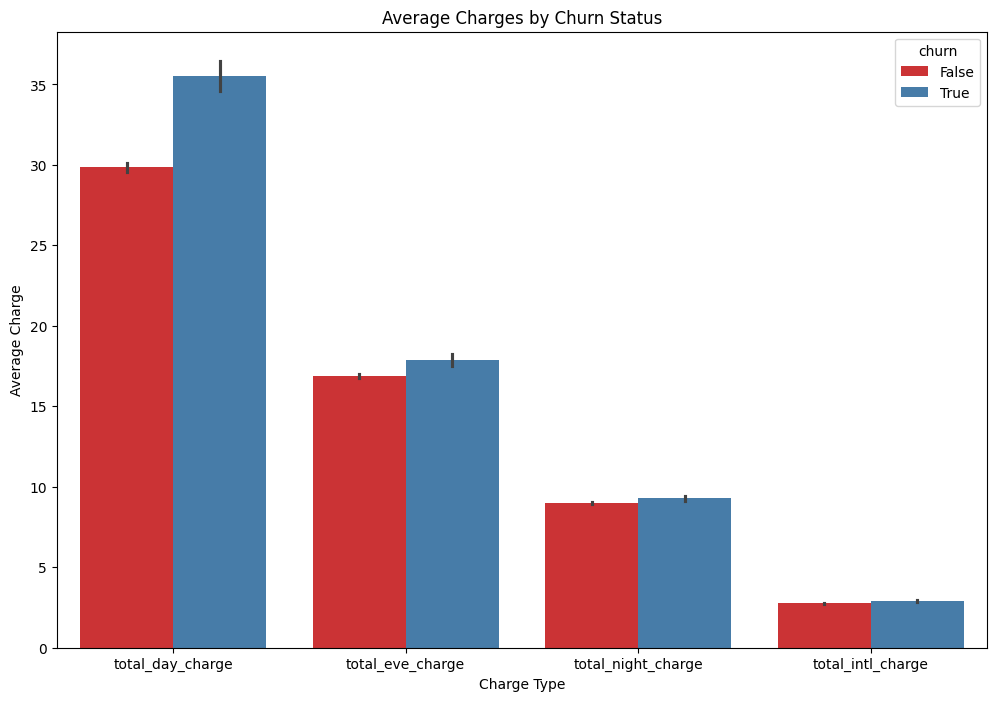

In [40]:
# Plot average charges by churn status
df_melted = df.melt(id_vars='churn', value_vars=['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'],
                    var_name='Charge_Type', value_name='Charge')

plt.figure(figsize=(12, 8))
sns.barplot(x='Charge_Type', y='Charge', hue='churn', data=df_melted, palette='Set1')
plt.title('Average Charges by Churn Status')
plt.xlabel('Charge Type')
plt.ylabel('Average Charge')
plt.show()


### Question: Is there a difference in the average length of time customers use the company’s service based on whether they have churned or not?

  Churn Status  Average Account Length
0        False               99.924973
1         True              102.137124


<ipython-input-26-f6d346190c6e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Churn Status', y='Average Account Length', data=average_account_length, palette='Set2')


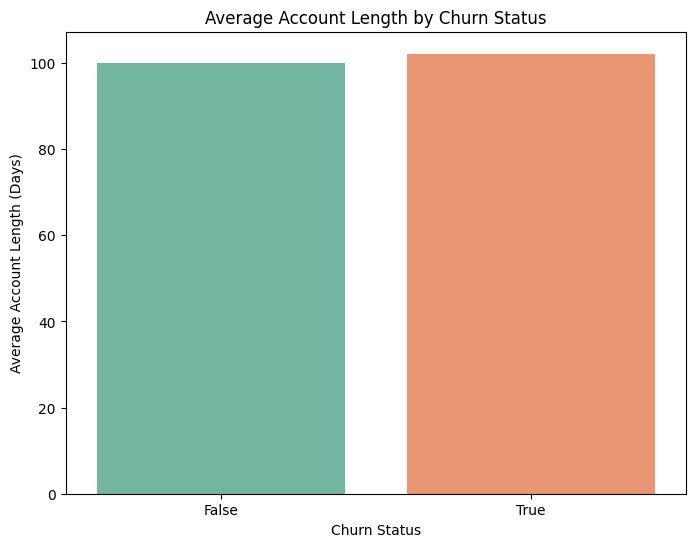

In [26]:
average_account_length = df.groupby('churn')['account_length'].mean().reset_index()
average_account_length.columns = ['Churn Status', 'Average Account Length']
print(average_account_length)

plt.figure(figsize=(8, 6))
sns.barplot(x='Churn Status', y='Average Account Length', data=average_account_length, palette='Set2')
plt.title('Average Account Length by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Average Account Length (Days)')
plt.show()

Customers who have churned have slightly higher average account length compared to who have not churned, however it shows no significant difference.